In [50]:
#Import libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import geopandas as gpd
import pandas as pd
from IPython.display import display
import numpy as np
import re



In [ ]:
#Read in data from first file
ucmr3=pd.read_csv("https://github.com/chencheny249/DataMiningProjSpring2025/blob/5777a5bb0d8dd7eaa06f48730eb5c3c39cf282ae/UCMR3_All.txt?raw=true", encoding='ISO-8859-1', delimiter='\t')
ucmr3.head()

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
0,010106001,Mashantucket Pequot Water System,L,6,MPTN WTP,GU,D11,WTP EPTDS,EP,202.0,...,0.07,µg/L,EPA 522,<,NaN,SE1,AM,1,01,NaN
1,010106001,Mashantucket Pequot Water System,L,6,MPTN WTP,GU,D11,WTP EPTDS,EP,202.0,...,20.00,µg/L,EPA 300.1,=,160.0,SE1,AM,1,01,NaN
2,010106001,Mashantucket Pequot Water System,L,6,MPTN WTP,GU,D11,WTP EPTDS,EP,202.0,...,0.20,µg/L,EPA 200.8,<,NaN,SE1,AM,1,01,NaN
3,010106001,Mashantucket Pequot Water System,L,6,MPTN WTP,GU,D11,WTP EPTDS,EP,202.0,...,0.30,µg/L,EPA 200.8,=,72.0,SE1,AM,1,01,NaN
4,010106001,Mashantucket Pequot Water System,L,6,MPTN WTP,GU,D11,WTP EPTDS,EP,202.0,...,1.00,µg/L,EPA 200.8,<,NaN,SE1,AM,1,01,NaN


In [ ]:
#Read in data from second file
ucmr4=pd.read_csv("https://github.com/chencheny249/DataMiningProjSpring2025/blob/5777a5bb0d8dd7eaa06f48730eb5c3c39cf282ae/UCMR4_All.txt?raw=true", encoding='ISO-8859-1', delimiter='\t')
ucmr4.head()


,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
0,010106001,Mashantucket Pequot Water,L,1,MPTN Distribution System,GU,D12,4 Pequot Circle,DS,NaN,...,NaN,µg/L,EPA 552.3,=,17.342,SE1,AM,1,01,NaN
1,010106001,Mashantucket Pequot Water,L,1,MPTN Distribution System,GU,D12,4 Pequot Circle,DS,NaN,...,NaN,µg/L,EPA 552.3,=,16.800,SE1,AM,1,01,NaN
2,010106001,Mashantucket Pequot Water,L,1,MPTN Distribution System,GU,D12,4 Pequot Circle,DS,NaN,...,NaN,µg/L,EPA 552.3,=,10.882,SE1,AM,1,01,NaN
3,010106001,Mashantucket Pequot Water,L,1,MPTN Distribution System,GU,D12,4 Pequot Circle,DS,NaN,...,NaN,µg/L,EPA 552.3,=,0.748,SE2,AM,1,01,NaN
4,010106001,Mashantucket Pequot Water,L,1,MPTN Distribution System,GU,D12,4 Pequot Circle,DS,NaN,...,NaN,µg/L,EPA 552.3,=,0.748,SE2,AM,1,01,NaN


In [ ]:
#Read in data from last file
ucmr5=pd.read_csv("https://github.com/chencheny249/DataMiningProjSpring2025/blob/5777a5bb0d8dd7eaa06f48730eb5c3c39cf282ae/UCMR5_All.txt?raw=true", encoding='ISO-8859-1', delimiter='\t')
ucmr5.head()

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
0,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.002,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
1,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.005,µg/L,EPA 537.1,<,NaN,SE1,AM,1,01,NaN
2,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
3,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.003,µg/L,EPA 533,=,0.0035,SE1,AM,1,01,NaN
4,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.007,µg/L,EPA 537.1,<,NaN,SE1,AM,1,01,NaN


In [6]:
#merge datasets
df=pd.concat([ucmr5, ucmr4, ucmr3], ignore_index=True, sort=False)
df.head()


,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
0,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.002,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
1,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.005,µg/L,EPA 537.1,<,NaN,SE1,AM,1,01,NaN
2,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
3,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.003,µg/L,EPA 533,=,0.0035,SE1,AM,1,01,NaN
4,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.007,µg/L,EPA 537.1,<,NaN,SE1,AM,1,01,NaN


In [7]:
#Check if merge worked
ucmr5.shape[0]+ucmr4.shape[0]+ucmr3.shape[0]==df.shape[0]

True

In [8]:
#Check for NAs
df.isna().sum()

PWSID                            0
PWSName                          0
Size                             0
FacilityID                      60
FacilityName                    30
FacilityWaterType                0
SamplePointID                    0
SamplePointName                  0
SamplePointType                  0
AssociatedFacilityID       2503268
AssociatedSamplePointID    2503268
CollectionDate                   0
SampleID                         0
Contaminant                      0
MRL                         190359
Units                            0
MethodID                         0
AnalyticalResultsSign            0
AnalyticalResultValue      2850960
SampleEventCode                  0
MonitoringRequirement            0
Region                           0
State                            0
UCMR1SampleType            3363695
dtype: int64

FacilityID and FacilityName: since they refer to the same thing, any FacilityName with a NA will be filled with its corresponding FacilityID, if there is one.

AssociatedFacilityID and AssociatedSamplePointID: these are all null per the dataset technical documents. These columns will be deleted.

MRL: Certain contaminants do not have a MRL (minimum reporting level). This value does not have any health implications - it is just the lowest value that labs can report. NAs will be replaced with -1. It is the Anlaytical Result Value that tells us the actual concentration.

AnalyticalResultValue: per the technical documentation provided by the EPA, this value is NA when it is under the MRL. For all intents and purposes, these NAs will be replaced with 0 since they are lower than the minimum value labs need to report.

UCMR1SampleType: This is not needed for our analysis and will be deleted.

In [ ]:
#Fill NAs as described above
df.fillna({'AnalyticalResultValue':0}, inplace=True)
df.fillna({'FacilityName':df['FacilityID']}, inplace=True)
df.fillna({'MRL':-1}, inplace=True)

In [ ]:
#Create dictionary for PWS Names and IDs (ID column will be deleted, the dictionary allows us to call it back by name)
PWS_dict=dict(zip(df['PWSName'],df['PWSID']))
PWS_dict['Mashantucket Pequot Water System']

'010106001'

In [ ]:
#Dictionary for Facility Name and ID (FacilityID will be dropped)
facilities_dict=dict(zip(df['FacilityName'],df['FacilityID']))
facilities_dict['MPTN WTP']

6

In [ ]:
#Drop unnecessary columns
df=df.drop(['PWSID','FacilityID', 'SamplePointID', "MethodID", "AssociatedFacilityID","AssociatedSamplePointID","SampleEventCode","UCMR1SampleType"],axis=1)
df.head()

,PWSName,Size,FacilityName,FacilityWaterType,SamplePointName,SamplePointType,CollectionDate,SampleID,Contaminant,MRL,Units,AnalyticalResultsSign,AnalyticalResultValue,MonitoringRequirement,Region,State
0,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,9/27/2023,810-79458-1,9Cl-PF3ONS,0.002,µg/L,<,0.0000,AM,1,01
1,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,8/9/2023,810-73346-1,NEtFOSAA,0.005,µg/L,<,0.0000,AM,1,01
2,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,9/27/2023,810-79458-1,PFNA,0.004,µg/L,<,0.0000,AM,1,01
3,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,9/27/2023,810-79458-1,PFHpA,0.003,µg/L,=,0.0035,AM,1,01
4,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,8/9/2023,810-73346-1,PFTrDA,0.007,µg/L,<,0.0000,AM,1,01


In [ ]:
#Check for NAs again
df.isna().sum()

PWSName                  0
Size                     0
FacilityName             0
FacilityWaterType        0
SamplePointName          0
SamplePointType          0
CollectionDate           0
SampleID                 0
Contaminant              0
MRL                      0
Units                    0
AnalyticalResultsSign    0
AnalyticalResultValue    0
MonitoringRequirement    0
Region                   0
State                    0
dtype: int64

In [18]:
"""Data overview"""

# Display dataset overview
print("\n📌 Dataset Shape (Rows, Columns):")
print(df.shape)

print("\n📌 Column Names:")
print(df.columns.tolist())

print("\n📌 General Info:")
df.info()  # No need to use print() since info() already prints output

print("\n📌 Missing Values Count per Column:")
print(df.isna().sum())

print("\n📌 Percentage of Missing Values per Column:")
print(df.isna().mean() * 100)

print("\n📌 Unique Value Count per Column:")
print(df.nunique())

print("\n📌 Summary Statistics for Categorical Columns:")
print(df.describe(include="object"))

print("\n📌 Number of Duplicate Rows:")
print(df.duplicated().sum())

print("\n📌 Columns with Only One Unique Value:")
print(df.nunique()[df.nunique() == 1])


📌 Dataset Shape (Rows, Columns):
(3363695, 16)

📌 Column Names:
['PWSName', 'Size', 'FacilityName', 'FacilityWaterType', 'SamplePointName', 'SamplePointType', 'CollectionDate', 'SampleID', 'Contaminant', 'MRL', 'Units', 'AnalyticalResultsSign', 'AnalyticalResultValue', 'MonitoringRequirement', 'Region', 'State']

📌 General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3363695 entries, 0 to 3363694
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PWSName                object 
 1   Size                   object 
 2   FacilityName           object 
 3   FacilityWaterType      object 
 4   SamplePointName        object 
 5   SamplePointType        object 
 6   CollectionDate         object 
 7   SampleID               object 
 8   Contaminant            object 
 9   MRL                    float64
 10  Units                  object 
 11  AnalyticalResultsSign  object 
 12  AnalyticalResultValue  float64
 13  Monitoring

In [21]:
"""Data overview 2: list of unique values per column"""

for col in df.columns:
    unique_values = df[col].unique()  # Get unique values
    print(f"\n📌 Unique values in column: {col} ({len(unique_values)} unique values)")
    print(unique_values[:10])  # Show only first 10 unique values for readability


📌 Unique values in column: PWSName (16507 unique values)
['Mashantucket Pequot Water System' 'Mohegan Tribal Utility Authority'
 'CATTARAUGUS CWS' 'POARCH CREEK UTILITIES - WEST' 'CHEROKEE WATER SYSTEM'
 'EAST BAY WATER WORKS' 'HANNAHVILLE COMMUNITY'
 'LITTLE RIVER TRIBAL WATER SYSTEM' 'VINELAND' 'PRAIRIE ISLAND']

📌 Unique values in column: Size (2 unique values)
['L' 'S']

📌 Unique values in column: FacilityName (25794 unique values)
['MPTN WTP' 'Blended Tank' 'Richardson Road Wells Treatment'
 'Connection to Erie County' 'MAIN PLANT-WEST WELL#1'
 'TULLIS TP - EAST WELL#2' 'Treatment Plant' 'Treatment Plant #1'
 'Treatment Plant #2' 'Hannahville Water Operations']

📌 Unique values in column: FacilityWaterType (4 unique values)
['GU' 'SW' 'GW' 'MX']

📌 Unique values in column: SamplePointName (50316 unique values)
['Entry point to Dist. System' 'Entry Point to Dist. System'
 'Finished Water Sample Tap - Treatment Plant POE'
 'Sample Tap @ Erie County POE' 'West Well-WELL#1' 'EAST Wel

In [26]:
"""Data preprocessing 1: drop cols, filter for PFAS, add cols for Year and Month, calculate relative contamination levels"""


# Drop cols
### Add code here later, the df is small enough to handle for now

# Filter data for PFAS contaminants
pfas_list = [
    "PFOA", "PFBS", "PFHpA", "PFHxS", "PFNA", "PFOS", "9Cl-PF3ONS", "NEtFOSAA",
    "PFTrDA", "ADONA", "PFTA", "NMeFOSAA", "PFHxA", "HFPO-DA", "PFPeS", "PFHpS",
    "PFDoA", "PFMPA", "11Cl-PF3OUdS", "PFDA", "PFEESA", "PFUnA", "PFBA", "PFPeA",
    "8:2 FTS", "NFDHA", "6:2 FTS", "4:2 FTS", "PFMBA"
]

df_PFAS = df[df["Contaminant"].isin(pfas_list)].copy()  


# Convert 'CollectionDate' to datetime, drop rows with missing datetime string
# Add cols for Year and Month 
df_PFAS["CollectionDate"] = pd.to_datetime(df_PFAS["CollectionDate"], errors='coerce')
df_PFAS = df_PFAS.dropna(subset=["CollectionDate"]) 

df_PFAS["Year"] = df_PFAS["CollectionDate"].dt.year
df_PFAS["Month"] = df_PFAS["CollectionDate"].dt.month


# Add cols for MRL level exceeded: Count '<' and '=' occurrences and create seperate columns, add a col for count of both (total)
df_PFAS.loc[:, 'Count_Less_Than'] = (df_PFAS['AnalyticalResultsSign'] == '<').astype(int)
df_PFAS.loc[:, 'Count_Equals'] = (df_PFAS['AnalyticalResultsSign'] == '=').astype(int)
df_PFAS.loc[:, "Total_Values"] = df_PFAS["Count_Less_Than"] + df_PFAS["Count_Equals"]

# Add a column for proportion of contaminated samples
df_PFAS['Equals_Per_Total'] = df_PFAS['Count_Equals'] / df_PFAS['Total_Values']


# Add col for Relative Contamination level (delta AnalyticalResultValue / MRL); only for values with AnalyticalResultsSign "="
# This divides the measured value for samples exceeding the threshold MRL, by the MRL value
# Result is a measure how much the MRL is exceeded
df_PFAS.loc[df_PFAS["AnalyticalResultsSign"] == "=", "Relative_Contamination_Level"] = (
    df_PFAS["AnalyticalResultValue"] / df_PFAS["MRL"]
)


print("\n📌 Processed data -- General Info:")
df_PFAS.info()  

display(df_PFAS)



📌 Processed data -- General Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1537584 entries, 0 to 3363694
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   PWSName                       1537584 non-null  object        
 1   Size                          1537584 non-null  object        
 2   FacilityName                  1537584 non-null  object        
 3   FacilityWaterType             1537584 non-null  object        
 4   SamplePointName               1537584 non-null  object        
 5   SamplePointType               1537584 non-null  object        
 6   CollectionDate                1537584 non-null  datetime64[ns]
 7   SampleID                      1537584 non-null  object        
 8   Contaminant                   1537584 non-null  object        
 9   MRL                           1537584 non-null  float64       
 10  Units                         153758

,PWSName,Size,FacilityName,FacilityWaterType,SamplePointName,SamplePointType,CollectionDate,SampleID,Contaminant,MRL,...,MonitoringRequirement,Region,State,Year,Month,Count_Less_Than,Count_Equals,Total_Values,Equals_Per_Total,Relative_Contamination_Level
0,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,2023-09-27,810-79458-1,9Cl-PF3ONS,0.002,...,AM,1,01,2023,9,1,0,1,0.0,NaN
1,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,2023-08-09,810-73346-1,NEtFOSAA,0.005,...,AM,1,01,2023,8,1,0,1,0.0,NaN
2,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,2023-09-27,810-79458-1,PFNA,0.004,...,AM,1,01,2023,9,1,0,1,0.0,NaN
3,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,2023-09-27,810-79458-1,PFHpA,0.003,...,AM,1,01,2023,9,0,1,1,1.0,1.166667
4,Mashantucket Pequot Water System,L,MPTN WTP,GU,Entry point to Dist. System,EP,2023-08-09,810-73346-1,PFTrDA,0.007,...,AM,1,01,2023,8,1,0,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363679,Casper Board of Public Utilities,L,GUDI Plant,GU,EPTDS from GUDI Plant,EP,2015-12-16,201511140097AM,PFBS,0.090,...,AM,8,WY,2015,12,1,0,1,0.0,NaN
3363680,Casper Board of Public Utilities,L,GUDI Plant,GU,EPTDS from GUDI Plant,EP,2015-12-16,201511140097AM,PFHpA,0.010,...,AM,8,WY,2015,12,1,0,1,0.0,NaN
3363681,Casper Board of Public Utilities,L,GUDI Plant,GU,EPTDS from GUDI Plant,EP,2015-12-16,201511140097AM,PFHxS,0.030,...,AM,8,WY,2015,12,1,0,1,0.0,NaN
3363682,Casper Board of Public Utilities,L,GUDI Plant,GU,EPTDS from GUDI Plant,EP,2015-12-16,201511140097AM,PFNA,0.020,...,AM,8,WY,2015,12,1,0,1,0.0,NaN


In [35]:
"""Data preprocessing 2: Create seperate data frames for 2024, and for Aggregation per state (incl coordinates)"""

#!pip install lxml
# Create seperate file for 2024 data only
df_PFAS_2024 = df_PFAS[df_PFAS["CollectionDate"].dt.year == 2024].copy()

# Aggregate data per state
df_states = df_PFAS_2024.groupby("State").agg(
    Total_Values=('Total_Values', 'sum'),
    Count_Less_Than=('Count_Less_Than', 'sum'),
    Count_Equals=('Count_Equals', 'sum'),
    Max_Relative_Contamination=('Relative_Contamination_Level', 'max'),
    Mean_Relative_Contamination=('Relative_Contamination_Level', 'mean')
).reset_index()

# Remove non-state territories (i.e. numbers instead of states in state col)
df_states = df_states.iloc[8:].reset_index(drop=True)

# Add col for contaminated samples: "samples exceeding MRL" / "total samples"
df_states["Equals_Per_Total"] = df_states["Count_Equals"] / df_states["Total_Values"]
df_states.insert(4, "Equals_Per_Total", df_states.pop("Equals_Per_Total"))



"""All below: Code to add (lognitudinal, latiduninal) coordinates to states data frame"""
# US territories and DC are ignored

# Scrape state coordinates
url = "https://www.latlong.net/category/states-236-14.html"
tables = pd.read_html(url)  # Reads all tables on the page
df_coords = tables[0]  # The first table contains the data
df_coords.columns = ["State_long", "Latitude", "Longitude"]  # Rename columns

# Clean up state names: Remove variations like ", usa", "the us", etc.
df_coords["State_long"] = df_coords["State_long"].str.lower().str.strip()
df_coords["State_long"] = df_coords["State_long"].apply(lambda x: re.sub(r",? (the )?us(a)?$", "", x))



# Create a Reference DataFrame with state abbreviations to match with our data and add abbreviations to df_coords
state_abbreviations = pd.DataFrame({
    'State_long': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
              'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
              'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'State': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                     'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                     'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                     'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                     'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
})

state_abbreviations["State_long"] = state_abbreviations["State_long"].str.strip().str.lower()
df_coords = pd.merge(df_coords, state_abbreviations, on="State_long", how="left")
df_coords.drop(columns=['State_long'], inplace=True)

# Add coordinates to our data frame df_states
if "Longitude" not in df_states.columns or "Latitude" not in df_states.columns:
    df_states = pd.merge(df_states, df_coords, on="State", how="left")

    # Move "Latitude" and "Longitude" to the second position (index 1)
    df_states.insert(1, "Latitude", df_states.pop("Latitude"))
    df_states.insert(2, "Longitude", df_states.pop("Longitude"))


display(df_states)

,State,Latitude,Longitude,Total_Values,Count_Less_Than,Count_Equals,Equals_Per_Total,Max_Relative_Contamination,Mean_Relative_Contamination
0,AK,66.160507,-153.369141,1479,1462,17,0.011494,10.175000,2.423039
1,AL,32.318230,-86.902298,22238,21556,682,0.030668,51.800000,3.803844
2,AR,34.799999,-92.199997,5764,5764,0,0.000000,NaN,NaN
3,AS,NaN,NaN,1193,1192,1,0.000838,1.033333,1.033333
4,AZ,34.048927,-111.093735,23229,22950,279,0.012011,48.000000,3.835430
5,CA,36.778259,-119.417931,86996,85634,1362,0.015656,83.400000,2.376597
6,CO,39.113014,-105.358887,10743,10586,157,0.014614,30.500000,2.106348
7,CT,41.599998,-72.699997,5473,5292,181,0.033071,5.000000,1.449641
8,DC,NaN,NaN,348,342,6,0.017241,1.566667,1.316667
9,DE,39.000000,-75.500000,4081,3953,128,0.031365,35.333333,3.826458


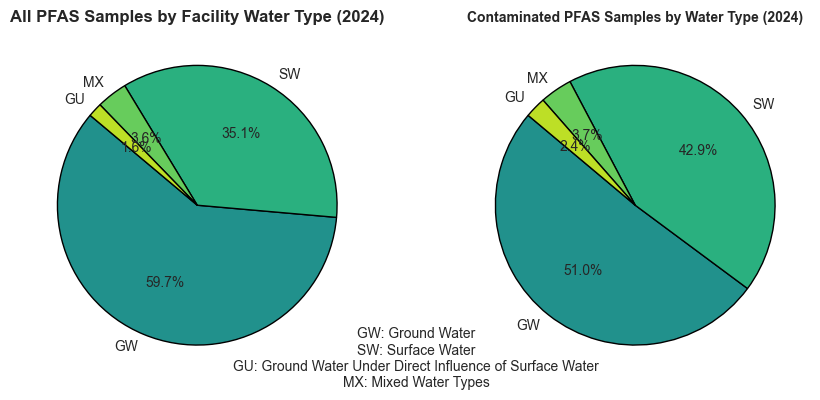

In [54]:
"""Visualization: Pie chart of sample water sources: all samples vs only contaminated samples (PFAS only, 2024, all states)"""

# Count occurrences of each FacilityWaterType (all values and confirmed contaminated)
water_type_counts = df_PFAS_2024["FacilityWaterType"].value_counts()
water_type_confirmed = df_PFAS_2024[df_PFAS_2024["AnalyticalResultsSign"] == "="]["FacilityWaterType"].value_counts()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
viridis_cmap = sns.color_palette("viridis", as_cmap=True)

colors = [viridis_cmap(i) for i in np.linspace(0.5, 0.9, len(water_type_counts))]  # Sample from light range

# First Pie Chart - All samples
axes[0].pie(
    water_type_counts, 
    labels=water_type_counts.index,  
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
axes[0].set_title("All PFAS Samples by Facility Water Type (2024)", fontsize=12, fontweight="bold")

# Second Pie Chart - Only Confirmed Contamination ( AnalyticalResultsSign = "=")
axes[1].pie(
    water_type_confirmed, 
    labels=water_type_confirmed.index,  
    autopct="%1.1f%%",
    colors=colors,  
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
axes[1].set_title("Contaminated PFAS Samples by Water Type (2024)", fontsize=10, fontweight="bold")

legend_text = """GW: Ground Water
SW: Surface Water
GU: Ground Water Under Direct Influence of Surface Water
MX: Mixed Water Types"""
fig.text(0.5, 0.02, legend_text, ha="center", fontsize=10)

plt.tight_layout()
plt.show()


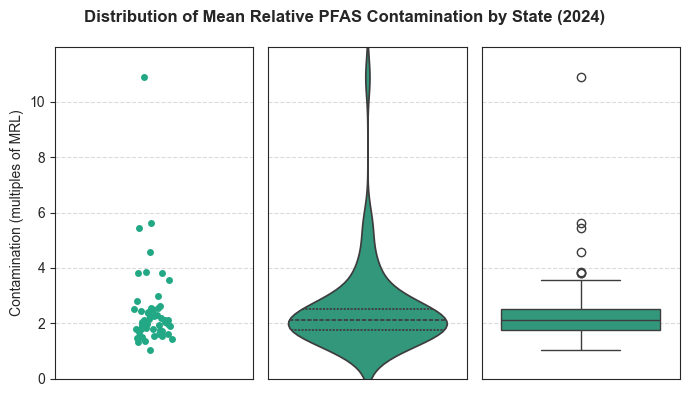

In [38]:
"""Visualization: Strip, violin, bar plots of mean relative contamination (2024)"""

# Set general plot style
sns.set_style("ticks")

# Create a single-row, three-column figure layout
fig, axes = plt.subplots(1, 3, figsize=(7, 4))

# Global y-axis limits
y_min = 0
y_max = df_states["Mean_Relative_Contamination"].max() * 1.1

# Strip plot for Mean Relative Contamination
main_color = sns.color_palette("viridis", as_cmap=True)(0.6)
sns.stripplot(y=df_states["Mean_Relative_Contamination"], ax=axes[0], jitter=True, color=main_color)
axes[0].set_ylabel("Contamination (multiples of MRL)")

# Violin plot for Mean Relative Contamination
sns.violinplot(y=df_states["Mean_Relative_Contamination"], ax=axes[1], inner="quartile", color=main_color)
axes[1].set_ylabel("")
axes[1].set_yticklabels([])  
axes[1].tick_params(left=False)  

# Box plot for Mean Relative Contamination
sns.boxplot(y=df_states["Mean_Relative_Contamination"], ax=axes[2], color=main_color)
axes[2].set_ylabel("")
axes[2].set_yticklabels([])  
axes[2].tick_params(left=False)  

# Set same y-axis range for all subplots and add horizontal gridlines
for ax in axes:
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_ylim(y_min, y_max)  
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)  

fig.suptitle("Distribution of Mean Relative PFAS Contamination by State (2024)", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

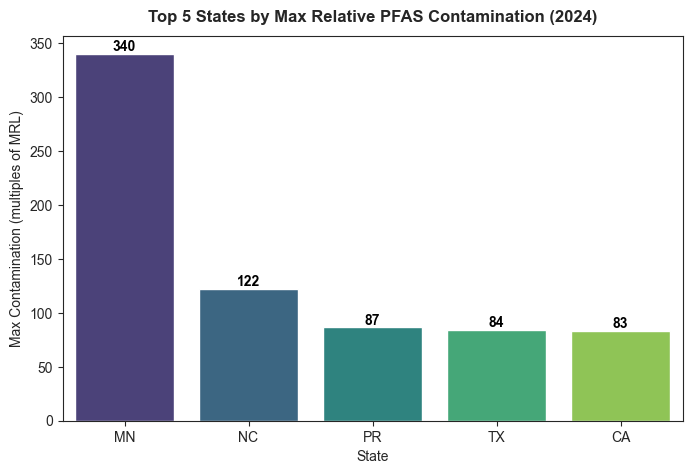

In [85]:
"""Visualization: Plot the top 5 states with the highest Max_Relative_Contamination (2024)"""

# Get the top 5 states with the highest Max_Relative_Contamination
top5_states = df_states.nlargest(5, "Max_Relative_Contamination").copy()

plt.figure(figsize=(8, 5)) 
ax = sns.barplot(
    data=top5_states,
    x="State",
    y="Max_Relative_Contamination",
    palette="viridis",
    legend=False,
    hue="State"
)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10, 
        fontweight="bold",
        color="black"
    )

plt.title("Top 5 States by Max Relative PFAS Contamination (2024)", fontsize=12, fontweight="bold", pad=10)
plt.xlabel("State", fontsize=10)
plt.ylabel("Max Contamination (multiples of MRL)", fontsize=10)


plt.show()


   State   Latitude   Longitude  Total_Values  Count_Less_Than  Count_Equals  \
1     AL  32.318230  -86.902298         22238            21556           682   
2     AR  34.799999  -92.199997          5764             5764             0   
4     AZ  34.048927 -111.093735         23229            22950           279   
5     CA  36.778259 -119.417931         86996            85634          1362   
6     CO  39.113014 -105.358887         10743            10586           157   
7     CT  41.599998  -72.699997          5473             5292           181   
8     DC        NaN         NaN           348              342             6   
9     DE  39.000000  -75.500000          4081             3953           128   
10    FL  27.994402  -81.760254         26933            26076           857   
11    GA  33.247875  -83.441162         15094            14726           368   
14    IA  42.032974  -93.581543          5211             5153            58   
15    ID  44.068203 -114.742043         

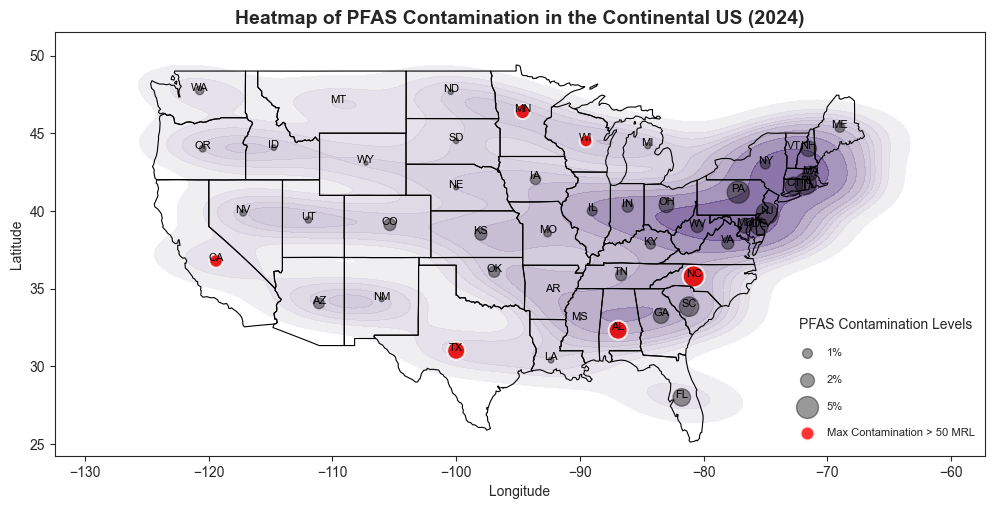

In [47]:
"""Visualization: Create heat map of PFAS contamination -- Percentage of Samples Exceeding MRL by State (2024)"""

# Filter df_states to include only continental U.S. states
non_continental_states = ["AK", "HI", "PR", "GU", "VI", "MP", "AS"]
df_states_cont = df_states[~df_states["State"].isin(non_continental_states)].copy()

print(df_states_cont)

# Load US states borders from GeoJSON
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
usa = gpd.read_file(url)
usa_continental = usa[~usa["id"].isin(non_continental_fips)] # FIlter out non-continental states

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

usa_continental.boundary.plot(ax=ax, linewidth=0.8, color="black")

# Create the heatmap
blue_tone = sns.color_palette("viridis", as_cmap=True)(0.1)  

sns.kdeplot(
    data=df_states_cont,
    x="Longitude",
    y="Latitude",
    cmap= sns.light_palette(blue_tone, as_cmap=True),
    fill=True,
    bw_adjust=0.5,
    alpha=0.7,
    thresh=0.05,
    ax=ax
)

# Define scaling for legend
scale_factor = 5000  # Match the scatter size scaling
sizes = [ 0.01, 0.02, 0.05]  # Example PFAS detection levels
legend_labels = [f"{s*100:.00f}%" for s in sizes]

# Overlay PFAS contamination points
plt.scatter(
    df_states_cont["Longitude"],
    df_states_cont["Latitude"],
    s=df_states_cont["Equals_Per_Total"] * 5000,  # Scale based on detections
    color="black",
    alpha=0.4
)

# Highlight states where Max_Relative_Contamination > 50
high_contamination = df_states_cont[df_states_cont["Max_Relative_Contamination"] > 50]

plt.scatter(
    high_contamination["Longitude"],
    high_contamination["Latitude"],
    s=high_contamination["Equals_Per_Total"] * scale_factor * 1.2,  # Slightly bigger size
    color="red",
    edgecolor="white",
    linewidth=1.5,
    alpha=0.8,
    label="Max Contamination > 50"
)

# Add state labels
for _, row in df_states_cont.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["State"], fontsize=8, ha="center", color="black")

# Create a custom legend for scatter sizes
legend_handles = [
    plt.scatter([], [], s=s * scale_factor, color="black", alpha=0.4, label=label)
    for s, label in zip(sizes, legend_labels)
]


# Add the high-contamination legend entry
legend_handles.append(
    plt.scatter([], [], s=100, color="red", edgecolor="white", linewidth=1.5, alpha=0.8, label="Max Contamination > 50 MRL")
)
# Add the legend
ax.legend(handles=legend_handles, title="PFAS Contamination Levels", bbox_to_anchor=(1, 0.35), fontsize=8, frameon=False,labelspacing=1.5 )

# Set labels and title
plt.title("Heatmap of PFAS Contamination in the Continental US (2024)", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


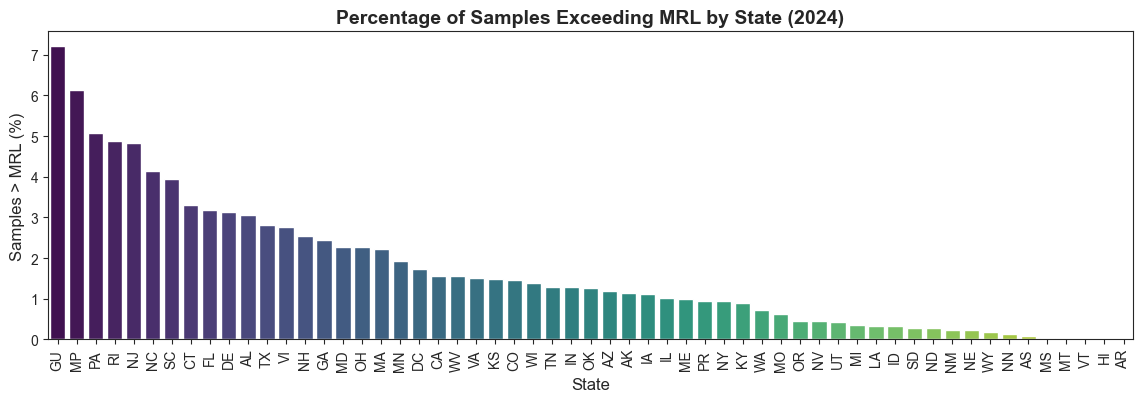

In [41]:
"""Visualization: Create historgram of PFAS Contamination -- Percentage of Samples Exceeding MRL by State (2024)"""

plt.figure(figsize=(14, 4))

# Convert y-axis to percentage and sort by value
df_sorted = df_states.sort_values(by="Equals_Per_Total", ascending=False).copy()

sns.barplot(
    data=df_sorted,
    x="State",
    y=df_sorted["Equals_Per_Total"] * 100, 
    palette="viridis",
    hue = "State",
    legend = False
)

plt.xticks(rotation=90)

plt.title("Percentage of Samples Exceeding MRL by State (2024)", fontsize=14, fontweight="bold")
plt.ylabel("Samples > MRL (%)", fontsize=12) 
plt.xlabel("State", fontsize=12)

plt.show()


,Year,Total_Values,Count_Less_Than,Count_Equals,Max_Relative_Contamination,Mean_Relative_Contamination,Equals_Per_Total,Max_Relative_Contamination_N,Mean_Relative_Contamination_N,Equals_Per_Total_N
0,2014,1536,1373,163,32.5,4.378408,10.611979,1.000000,1.000000,1.000000
1,2024,10743,10586,157,30.5,2.106348,1.461417,0.938462,0.481076,0.137714


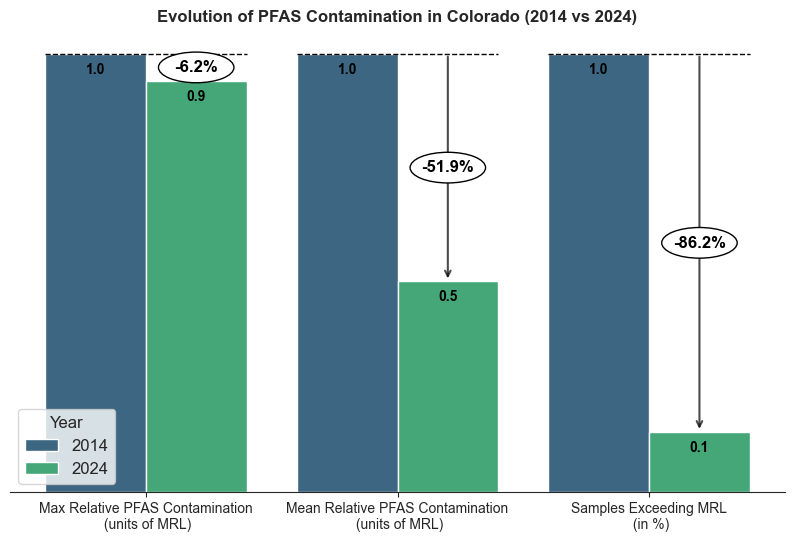

In [ ]:
"""Visualization: Plot PFAS contamination levels (samples exceeding MRL) for COLORADO over time"""

# FIlter for Colorado
df_PFAS_CO = df_PFAS[df_PFAS["State"] == "CO"]

# Filter for 2014 and 2024
df_PFAS_CO_2014_2024 = df_PFAS_CO[(df_PFAS_CO["Year"] == 2014) | (df_PFAS_CO["Year"] == 2024)]

# Aggregate data per year
df_years = df_PFAS_CO_2014_2024.groupby("Year").agg(
    Total_Values=('Total_Values', 'sum'),
    Count_Less_Than=('Count_Less_Than', 'sum'),
    Count_Equals=('Count_Equals', 'sum'),
    Max_Relative_Contamination=('Relative_Contamination_Level', 'max'),
    Mean_Relative_Contamination=('Relative_Contamination_Level', 'mean')
).reset_index()

# Add a relative column, contaminated samples / all samples
df_years["Equals_Per_Total"] = df_years['Count_Equals'] / df_years['Total_Values'] * 100

# Add normalized values for plotting
max_relative_cont_2014 = df_years.loc[df_years["Year"] == 2014, "Max_Relative_Contamination"].values[0]
mean_relative_cont_2014 = df_years.loc[df_years["Year"] == 2014, "Mean_Relative_Contamination"].values[0]
equals_per_total_2014 = df_years.loc[df_years["Year"] == 2014, "Equals_Per_Total"].values[0] 


df_years["Max_Relative_Contamination_N"] = df_years["Max_Relative_Contamination"] / max_relative_cont_2014
df_years["Mean_Relative_Contamination_N"] = df_years["Mean_Relative_Contamination"] / mean_relative_cont_2014
df_years["Equals_Per_Total_N"] = df_years["Equals_Per_Total"] / equals_per_total_2014 


# Display the aggregated DataFrame
display(df_years)


"""Create the bar comparison plot"""

df_years["Max Relative PFAS Contamination\n (units of MRL)"] = df_years["Max_Relative_Contamination_N"]
df_years["Mean Relative PFAS Contamination\n (units of MRL)"] = df_years["Mean_Relative_Contamination_N"]
df_years["Samples Exceeding MRL\n (in %)"] = df_years["Equals_Per_Total_N"]

# Define the normalized metrics for plotting
normalized_metrics = ["Max Relative PFAS Contamination\n (units of MRL)", "Mean Relative PFAS Contamination\n (units of MRL)", "Samples Exceeding MRL\n (in %)"]
original_metrics = ["Max Relative PFAS Contamination\n (units of MRL)", "Mean Relative PFAS Contamination\n (units of MRL)", "Samples Exceeding MRL\n (in %)"]

# Melt the DataFrame for seaborn
df_melted = df_years.melt(id_vars=["Year"], value_vars=normalized_metrics, var_name="Metric", value_name="Value")

# Create the seaborn bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x="Metric", y="Value", hue=df_melted["Year"].astype(str), palette="viridis")

# Convert df_years into a pivot table for easier lookup
df_pivot_norm = df_years.set_index("Year")[normalized_metrics].T  # Normalized values for plotting
df_pivot_orig = df_years.set_index("Year")[original_metrics].T  # Non-normalized values for annotations
df_pivot_norm["Percent_Change"] = ((df_pivot_norm[2024] - df_pivot_norm[2014]) / df_pivot_norm[2014]) * 100  # Compute % change

# Add value labels, arrows, and percentage change annotations
for i, (norm_metric, orig_metric) in enumerate(zip(normalized_metrics, original_metrics)):
    values_norm = df_pivot_norm.loc[norm_metric, [2014, 2024]].values  # Normalized values for bar heights
    values_orig = df_pivot_orig.loc[orig_metric, [2014, 2024]].values  # Non-normalized values for annotations
    percent_change = df_pivot_norm.loc[norm_metric, "Percent_Change"]  # Percentage change

    # Find x positions of bars for annotation
    bar1 = ax.patches[i]  # First bar (2014)
    bar2 = ax.patches[i + len(normalized_metrics)]  # Second bar (2024)
    
    # Add non-normalized value labels on top of bars
    # Adjust text position to be inside the bar at the top
    ax.annotate(f"{values_orig[0]:.1f}", 
                (bar1.get_x() + bar1.get_width() / 2, bar1.get_height() - 0.02),  # Move text inside the bar
                ha='center', va='top', fontsize=10, fontweight="bold", color="black")

    ax.annotate(f"{values_orig[1]:.1f}", 
                (bar2.get_x() + bar2.get_width() / 2, bar2.get_height() - 0.02),  # Move text inside the bar
                ha='center', va='top', fontsize=10, fontweight="bold", color="black")


    # Calculate arrow position
    x_start = bar1.get_x() + bar1.get_width() * 1.5  # Middle of first bar
    x_end = bar2.get_x() + bar2.get_width() / 2  # Middle of second bar
    y_start = bar1.get_height() * 1.0  # Slightly above first bar
    y_end = bar2.get_height() + 0.00  # Slightly above second bar

    # Draw an arrow **in the background** (before ellipses and text)
    ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", lw=1.5, color="black", alpha=0.7), zorder=1)

    # Calculate position for the percentage annotation
    mid_x = (x_start + x_end) / 2  # Midpoint between bars
    mid_y = (y_start + y_end) / 2  # Midpoint along the arrow

    # Draw an ellipse (oval) **on top of the arrow**
    ellipse = patches.Ellipse((mid_x, mid_y), width=0.3, height=0.07, 
                              edgecolor="black", facecolor="white", linewidth=1, zorder=2)
    ax.add_patch(ellipse)

    # Add percentage change text **on top of the ellipse**
    ax.annotate(f"{percent_change:.1f}%", (mid_x, mid_y), 
                ha='center', va='center', fontsize=12, fontweight="bold", color="black", zorder=3)

    # Add a thin black dashed line on top of the first bar and extend it to the second bar
    ax.plot([bar1.get_x(), bar2.get_x() + bar2.get_width()], 
            [y_start, y_start], color="black", linewidth=1, linestyle="dashed", zorder=1)

# Customize labels and title
plt.xlabel("")
plt.ylabel("Normalized Value")
ax.get_yaxis().set_visible(False)  # Hides the y-axis completely

plt.title("Evolution of PFAS Contamination in Colorado (2014 vs 2024)", fontweight="bold")
sns.despine(left=True, right=True, top=True, bottom=False)  # Removes borders

# Get x-tick positions and labels from the seaborn bar plot
xticks_positions = [tick.get_position()[0] for tick in ax.get_xticklabels()]  # X-axis tick positions
xtick_labels = original_metrics  # Use original metrics for annotatio

plt.legend(title="Year", title_fontsize=12, fontsize=12)  # Increase title & text size

plt.show()



3.0


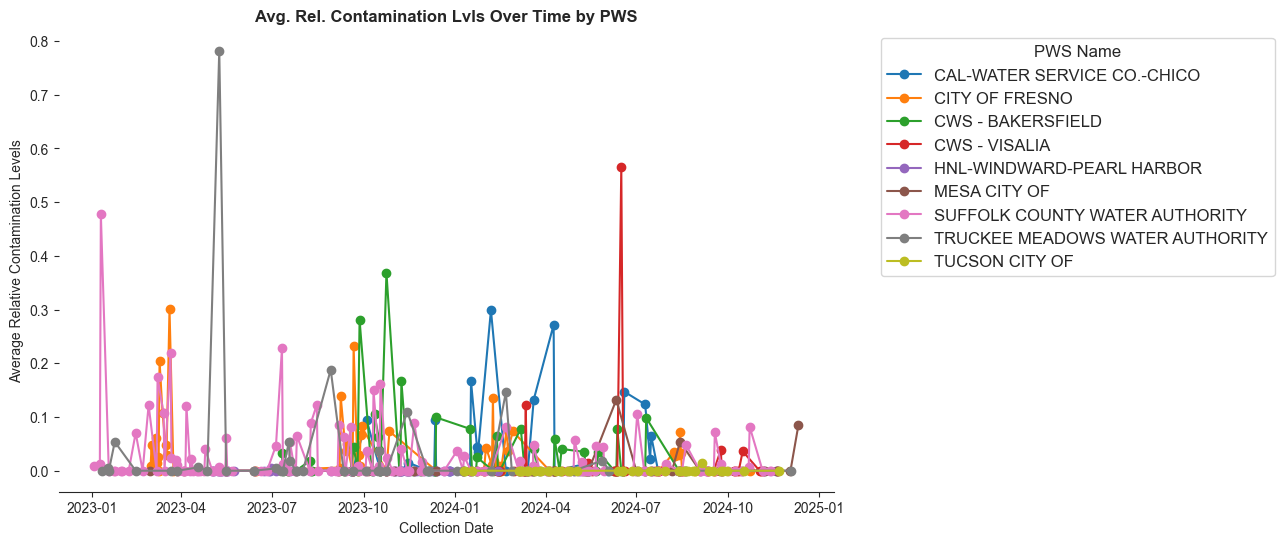

In [ ]:
df_PFAS_recent = df_PFAS[df_PFAS["CollectionDate"].dt.year >= 2023 ].copy()
#print(df_PFAS_recent)
df_PFAS_recent.fillna({'Relative_Contamination_Level':0}, inplace=True)
df_PFAS_recent = df_PFAS_recent.groupby(['PWSName', 'CollectionDate'], as_index=False)['Relative_Contamination_Level'].mean()
#print(df_PFAS_recent.head())
# Get the count of each unique 'PWSName'
pws_counts = df_PFAS_recent['PWSName'].value_counts()

print(df_PFAS_recent['PWSName'].value_counts().median())

# Filter the DataFrame to keep only 'PWSName' that occur more than 30 times
df_PFAS_recent = df_PFAS_recent[df_PFAS_recent['PWSName'].isin(pws_counts[pws_counts > 30].index)]
df_PFAS_recent.head()

plt.figure(figsize=(10, 6))

# Loop over each unique PWS Name
for pws in df_PFAS_recent['PWSName'].unique():
    # Filter the data for each PWS
    df_pws = df_PFAS_recent[df_PFAS_recent['PWSName'] == pws]
    
    # Plot each PWS's contamination over time 
    plt.plot(df_pws['CollectionDate'], df_pws['Relative_Contamination_Level'], label=pws, marker='o')

# Customize labels and title
plt.xlabel('Collection Date')
plt.ylabel("Average Relative Contamination Levels")

plt.title("Avg. Rel. Contamination Lvls Over Time by PWS", fontweight="bold")
sns.despine(left=True, right=True, top=True, bottom=False)  # Removes borders

# Get x-tick positions and labels from the seaborn bar plot
#xticks_positions = [tick.get_position()[0] for tick in ax.get_xticklabels()]  # X-axis tick positions
#xtick_labels = original_metrics  # Use original metrics for annotatio

plt.legend(title="PWS Name", title_fontsize=12, fontsize=12,bbox_to_anchor=(1.05, 1), loc='upper left')  # Increase title & text size

plt.show()
    


There doesn't seem to be a clear trend of contamination in the PWS's. There are some spikes, but no obvious signs of upward or downward trends.